In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
data = pd.read_csv('../../data/angular/train/dataset_all.csv')
data_5 = pd.read_csv('../../data/angular/train/dataset_5.csv')
data_1 = pd.read_csv('../../data/angular/train/dataset_1.csv')
data['index'] = data.index
data

,file_name,file_type,file_diff_type,file_diff,commit_id,commit_type,index
0,.github/angular-robot.yml,.yml,2,"- mergeConflictComment: ""Hi @{{PRAuthor}}! ...",f815aa19914a8cd55dc8db2a41254248ee0b83c8,1,0
1,.ng-dev/caretaker.ts,.ts,1,- import {CaretakerConfig} from '../dev-infra...,f815aa19914a8cd55dc8db2a41254248ee0b83c8,1,1
2,.ng-dev/config.ts,.ts,2,- import {caretaker} from './caretaker';- c...,f815aa19914a8cd55dc8db2a41254248ee0b83c8,1,2
3,dev-infra/BUILD.bazel,.bazel,2,"- ""//dev-infra/caretaker"",",1523f217e27be965ae41a1d3973a0226ee646de8,2,3
4,dev-infra/caretaker/BUILD.bazel,.bazel,1,"- load(""@npm_bazel_typescript//:index.bzl"", ""...",1523f217e27be965ae41a1d3973a0226ee646de8,2,4
...,...,...,...,...,...,...,...
191401,dev-infra/cli.ts,.ts,2,- import {buildCiParster} from './ci/cli';- ...,a4d3fadd31b491a2ca51c31323649fff0ff70159,2,191401
191402,dev-infra/utils/console.ts,.ts,2,- export const reset: typeof chalk = chalk.re...,a4d3fadd31b491a2ca51c31323649fff0ff70159,2,191402
191403,.circleci/bazel.windows.rc,.rc,2,+ # Save downloaded repositories in a locatio...,3730b2c8ea9e9fca3e8db54c1bbf17010d34e7c7,1,191403
191404,.circleci/config.yml,.yml,2,- name: Build all windows CI target...,3730b2c8ea9e9fca3e8db54c1bbf17010d34e7c7,1,191404


In [4]:
data.loc[data['commit_type'] == 1, 'commit_type'] = 'build'
data.loc[data['commit_type'] == 2, 'commit_type'] = 'ci'
data.loc[data['commit_type'] == 3, 'commit_type'] = 'docs'
data.loc[data['commit_type'] == 4, 'commit_type'] = 'feat'
data.loc[data['commit_type'] == 5, 'commit_type'] = 'fix'
data.loc[data['commit_type'] == 6, 'commit_type'] = 'perf'
data.loc[data['commit_type'] == 7, 'commit_type'] = 'refactor'
data.loc[data['commit_type'] == 8, 'commit_type'] = 'style'
data.loc[data['commit_type'] == 9, 'commit_type'] = 'test'

data

,file_name,file_type,file_diff_type,file_diff,commit_id,commit_type,index
0,.github/angular-robot.yml,.yml,2,"- mergeConflictComment: ""Hi @{{PRAuthor}}! ...",f815aa19914a8cd55dc8db2a41254248ee0b83c8,build,0
1,.ng-dev/caretaker.ts,.ts,1,- import {CaretakerConfig} from '../dev-infra...,f815aa19914a8cd55dc8db2a41254248ee0b83c8,build,1
2,.ng-dev/config.ts,.ts,2,- import {caretaker} from './caretaker';- c...,f815aa19914a8cd55dc8db2a41254248ee0b83c8,build,2
3,dev-infra/BUILD.bazel,.bazel,2,"- ""//dev-infra/caretaker"",",1523f217e27be965ae41a1d3973a0226ee646de8,ci,3
4,dev-infra/caretaker/BUILD.bazel,.bazel,1,"- load(""@npm_bazel_typescript//:index.bzl"", ""...",1523f217e27be965ae41a1d3973a0226ee646de8,ci,4
...,...,...,...,...,...,...,...
191401,dev-infra/cli.ts,.ts,2,- import {buildCiParster} from './ci/cli';- ...,a4d3fadd31b491a2ca51c31323649fff0ff70159,ci,191401
191402,dev-infra/utils/console.ts,.ts,2,- export const reset: typeof chalk = chalk.re...,a4d3fadd31b491a2ca51c31323649fff0ff70159,ci,191402
191403,.circleci/bazel.windows.rc,.rc,2,+ # Save downloaded repositories in a locatio...,3730b2c8ea9e9fca3e8db54c1bbf17010d34e7c7,build,191403
191404,.circleci/config.yml,.yml,2,- name: Build all windows CI target...,3730b2c8ea9e9fca3e8db54c1bbf17010d34e7c7,build,191404


In [10]:
commits = data.groupby('commit_id', as_index=False).aggregate({'commit_type': 'first'})

# commits['count'].sum()
commits

,commit_id,commit_type
0,0001dbdede720293a95faa75b6187f53c92c579d,ci
1,00027130ea06231d23865dbb7172c2ed10e58c1e,docs
2,0004896ff940881cf4bf6332f55da9dbe907cf51,build
3,00070376ed80eac6ab5cfcba92050986c3bda97d,fix
4,00075647beee171ae06476d647168e9687c47195,fix
...,...,...
28832,fff2ca540f61f7922d417118de4ec773792362a5,fix
28833,fff424a35f11fd062e74e1158de26368ff190c65,fix
28834,fff93ae8f3dac74d68770128345e06e41687659f,docs
28835,fff9bd8fba997d49b36c9cb798ec70f428d8f23e,docs


In [13]:
commits.groupby('commit_type', as_index=False).aggregate({'commit_id': 'count'})


,commit_type,commit_id
0,build,5349
1,ci,3368
2,docs,7568
3,feat,2309
4,fix,6107
5,perf,393
6,refactor,2581
7,style,142
8,test,1020


In [8]:
# commit types:
# 1) build: Changes that affect the build system or external dependencies (example scopes: gulp, broccoli, npm)
# 2) ci: Changes to our CI configuration files and scripts (example scopes: Travis, Circle, BrowserStack, SauceLabs)
# 3) docs: Documentation only changes
# 4) feat: A new feature
# 5) fix: A bug fix
# 6) perf: A code change that improves performance
# 7) refactor: A code change that neither fixes a bug nor adds a feature
# 8) style: Changes that do not affect the meaning of the code (white-space, formatting, missing semi-colons, etc)
# 9) test: Adding missing tests or correcting existing tests

sns.set_style("whitegrid")
sns.set_palette('nipy_spectral')
plt = sns.displot(commits, x='commit_type')
plt.fig.set_size_inches(10,5)
plt.fig.savefig('../../data/angular/images/type_analize/commit_types.png')




NameError: name 'commits' is not defined

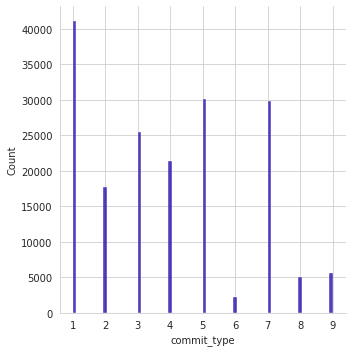

In [5]:
# plot for data_5
sns.displot(data_5, x='commit_type')

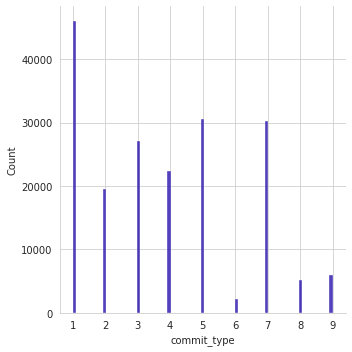

In [6]:
# plot for data_1
sns.displot(data_1, x='commit_type')


,fix_file_type,count
27,.ts,24424
16,.js,3457
17,.json,1028
8,.dart,553
0,.bazel,284
19,.md,186
15,.html,173
24,.scss,159
25,.sh,109
4,.bzl,98


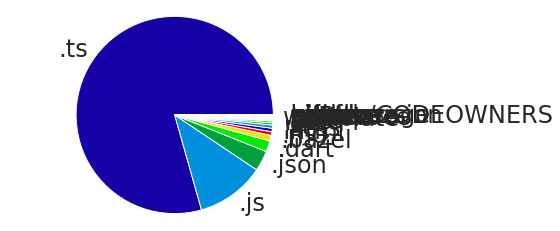

In [25]:
from matplotlib import pyplot as plt

fix_data = data[data.commit_type == 'fix']
fix_data = fix_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'fix_file_type', 'commit_id':'count'})

fig, ax = plt.subplots()
ax.pie(fix_data['count'], labels=fix_data['fix_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/fix_types.png')
fix_data

,doc_file_type,count
28,.ts,12878
22,.md,7065
19,.json,1999
16,.html,1981
18,.js,1147
25,.scss,677
6,.css,634
7,.dart,310
10,.es6,98
2,.bazel,82


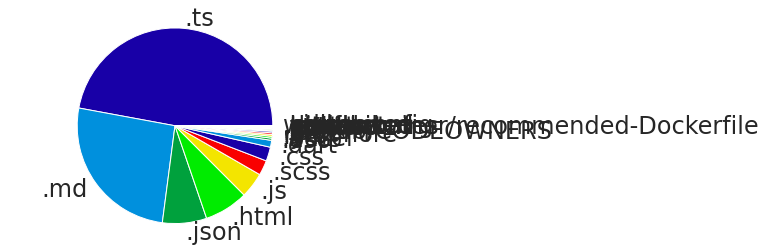

In [26]:
doc_data = data[data.commit_type == 'docs']
doc_data = doc_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'doc_file_type', 'commit_id':'count'})

fig, ax = plt.subplots()
ax.pie(doc_data['count'], labels=doc_data['doc_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/doc_types.png')
doc_data

,refactor_file_type,count
32,.ts,23403
22,.js,3479
14,.dart,1396
23,.json,868
8,.bazel,441
25,.md,179
16,.es6,130
21,.html,127
30,.sh,116
29,.scss,35


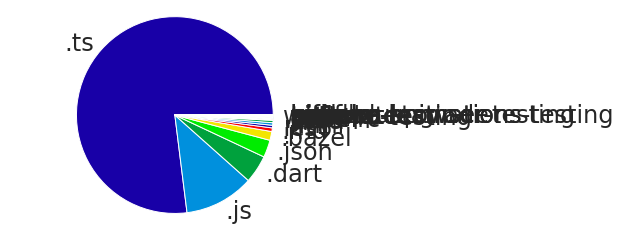

In [27]:
refactor_data = data[data.commit_type == 'refactor']
refactor_data = refactor_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'refactor_file_type', 'commit_id':'count'})

fig, ax = plt.subplots()
ax.pie(refactor_data['count'], labels=refactor_data['refactor_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/refactor_types.png')
refactor_data

,feat_file_type,count
32,.ts,14704
20,.js,2896
10,.dart,1435
21,.json,1000
18,.html,635
3,.bazel,550
13,.es6,280
28,.scss,257
23,.md,147
22,.lock,116


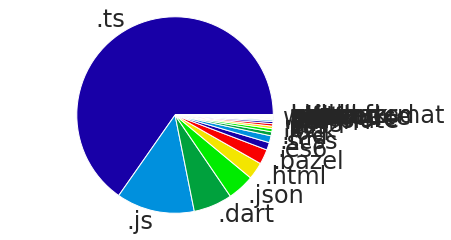

In [28]:
feat_data = data[data.commit_type == 'feat']
feat_data = feat_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'feat_file_type', 'commit_id':'count'})
fig, ax = plt.subplots()
ax.pie(feat_data['count'], labels=feat_data['feat_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/feat_types.png')

feat_data

,build_file_type,count
69,.ts,19596
46,.js,8459
48,.json,5579
12,.bazel,4861
50,.lock,1670
42,.html,1333
67,.sh,983
18,.bzl,944
52,.md,868
78,workspace,535


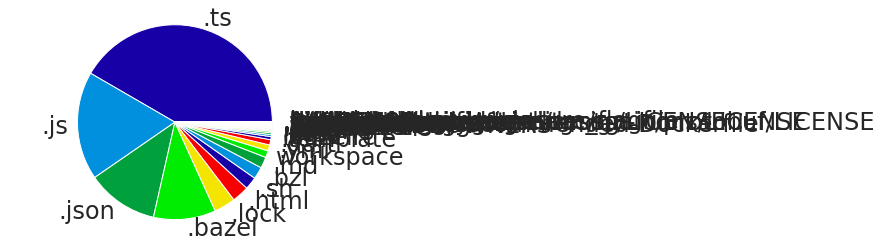

In [31]:
build_data = data[data.commit_type == 'build']
build_data = build_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'build_file_type', 'commit_id':'count'})
fig, ax = plt.subplots()
ax.pie(build_data['count'], labels=build_data['build_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/build_types.png')

build_data.head(15)

,test_file_type,count
27,.ts,3355
17,.js,806
19,.json,565
0,.bazel,558
9,.dart,160
16,.html,123
20,.lock,88
26,.sh,88
21,.md,56
8,.css,35


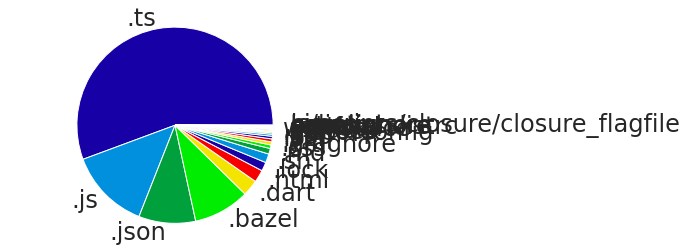

In [32]:
test_data = data[data.commit_type == 'test']
test_data = test_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'test_file_type', 'commit_id':'count'})

fig, ax = plt.subplots()
ax.pie(test_data['count'], labels=test_data['test_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/test_types.png')

test_data

,ci_file_type,count
39,.ts,13060
26,.json,1259
25,.js,1238
4,.bazel,864
45,.yml,679
37,.sh,659
28,.md,579
15,.dart,538
27,.lock,183
24,.html,152


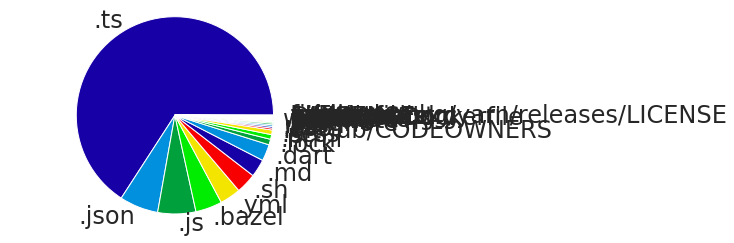

In [33]:
ci_data = data[data.commit_type == 'ci']
ci_data = ci_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'ci_file_type', 'commit_id':'count'})

fig, ax = plt.subplots()
ax.pie(ci_data['count'], labels=ci_data['ci_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/ci_types.png')

ci_data

,perf_file_type,count
11,.ts,1895
7,.json,109
6,.js,84
5,.html,54
0,.bazel,51
2,.dart,26
4,.es6,26
9,.md,12
3,.es5,2
1,.bzl,1


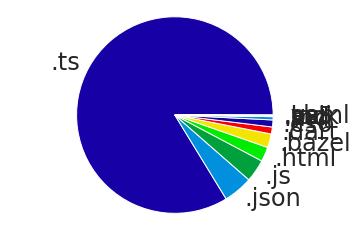

In [34]:
perf_data = data[data.commit_type == 'perf']
perf_data = perf_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'perf_file_type', 'commit_id':'count'})

fig, ax = plt.subplots()
ax.pie(perf_data['count'], labels=perf_data['perf_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/perf_types.png')

perf_data

,style_file_type,count
16,.ts,3441
11,.js,1161
5,.dart,417
10,.html,54
4,.css,29
12,.json,27
2,.bzl,15
14,.md,14
15,.scss,5
7,.es6,3


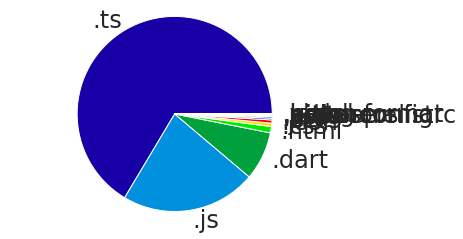

In [35]:
style_data = data[data.commit_type == 'style']
style_data = style_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'style_file_type', 'commit_id':'count'})

fig, ax = plt.subplots()
ax.pie(style_data['count'], labels=style_data['style_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/angular/images/type_analize/style_types.png')
style_data

In [7]:
types = data.groupby('file_type', as_index=False).aggregate({'file_name':'count'})\
    .sort_values('file_name', ascending=False)\
    .rename(columns={'file_name':'count'})
types.head(15)



,file_type,count
83,.ts,116756
56,.js,22727
58,.json,12434
63,.md,9106
16,.bazel,7692
32,.dart,5247
50,.html,4632
60,.lock,2209
80,.sh,2071
79,.scss,1431


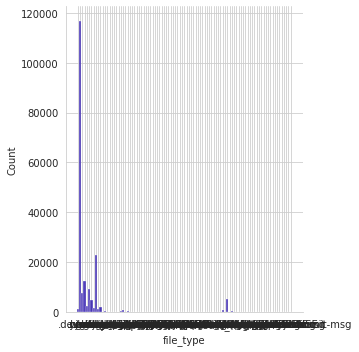

In [40]:
sns.displot(data, x='file_type')

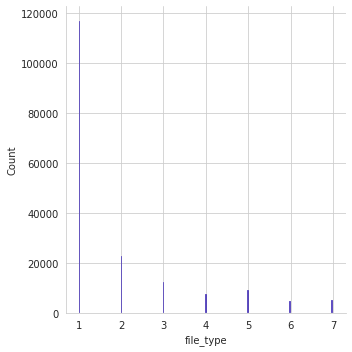